<img src="https://drive.google.com/uc?id=1-cL5eOpEsbuIEkvwW2KnpXC12-PAbamr" style="Width:1000px">

# Loss Functions

In this exercise, you will compare the effects of Loss functions on a linear regression model. We will use a dataset representing the physical features of a greenhouse against the average temperature inside of the greenhouse.

👇 Import the data from the attached csv file

In [1]:
# from nbta.utils import download_data
# download_data(id='17OpuYbIqGmt5YTRDyRT-Ikqbzg5sSTHZ')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('raw_data/data.csv')
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
0,0.98,514.5,294.0,110.25,7.0,0.0,18.44
1,0.98,514.5,294.0,110.25,7.0,0.0,18.44
2,0.98,514.5,294.0,110.25,7.0,0.0,18.44
3,0.98,514.5,294.0,110.25,7.0,0.0,18.44
4,0.90,563.5,318.5,122.50,7.0,0.0,24.56


In [3]:
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,23.447480
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,9.742474
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,8.475000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,14.375000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,20.485000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,32.167500
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,44.975000


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(data[['Wall Area']])

data[['Wall Area']] = scaler.transform(data[['Wall Area']])
data[['Wall Area']]

,Wall Area
0,-0.561951
1,-0.561951
2,-0.561951
3,-0.561951
4,0.000000
...,...
763,0.561951
764,1.123903
765,1.123903
766,1.123903


In [5]:
# After transformation
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,0.000000,176.604167,5.25000,0.234375,23.447480
std,0.105777,88.086116,1.000652,45.165950,1.75114,0.133221,9.742474
min,0.620000,514.500000,-1.685854,110.250000,3.50000,0.000000,8.475000
25%,0.682500,606.375000,-0.561951,140.875000,3.50000,0.100000,14.375000
50%,0.750000,673.750000,0.000000,183.750000,5.25000,0.250000,20.485000
75%,0.830000,741.125000,0.561951,220.500000,7.00000,0.400000,32.167500
max,0.980000,808.500000,2.247806,220.500000,7.00000,0.400000,44.975000


🎯 Your task is to predict the average temperature inside a greenhouse based on its design. Your temperature predictions will help you select the appropriate greenhouse design for each plant, based on their climatic needs. 

🌿 You know that plants can handle small temperature variations, but are exponentially more sensitive as the temperature variations increase. 

## Theory 

❓ Theoretically, which Loss function would you train your model on to limit the risk of killing plants?

<details>
<summary> 🆘 Answer </summary>
    
By theory, you would use a Mean Square Error (MSE) Loss function. It would penalize outlier predictions and prevent your model from committing large errors. This would ensure smaller temperature variations and a lower risk for plants.

</details>

> MSE

## Application

### Preprocessing

👇 Scale the features

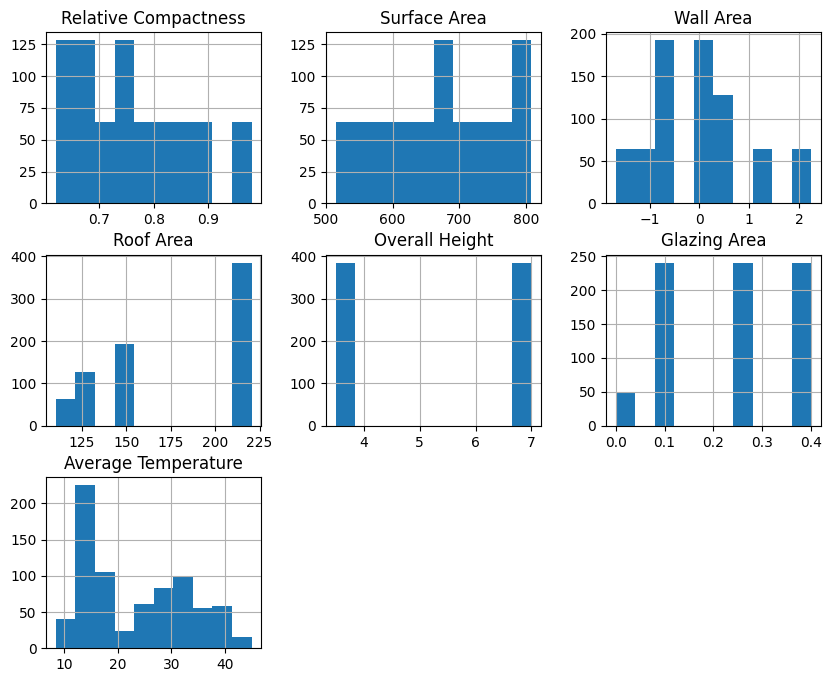

In [6]:
data.hist(figsize=(10,8));

In [7]:
from sklearn.preprocessing import MinMaxScaler
y=data['Average Temperature']
X=data.drop('Average Temperature', axis=1)

features = X.columns

scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

X

array([[1.        , 0.        , 0.28571429, 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 0.28571429, 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 0.28571429, 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.71428571, 1.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.71428571, 1.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.71428571, 1.        , 0.        ,
        1.        ]])

In [8]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.534722,0.428571,0.601852,0.500000,0.585938
std,0.293826,0.299613,0.254382,0.409668,0.500326,0.333051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.312500,0.285714,0.277778,0.000000,0.250000
50%,0.361111,0.541667,0.428571,0.666667,0.500000,0.625000
75%,0.583333,0.770833,0.571429,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Modelling

In this section, you are going to verify the theory by evaluating models optimized on different Loss functions.

### Least Squares (MSE) Loss

👇 **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **Least Squares Loss** (MSE)



In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate

SGD_MSE_model = SGDRegressor(loss='squared_error')

cross_val = cross_validate(SGD_MSE_model, X, y, cv=10, scoring=['max_error', 'r2'])

👇 Compute 
- the mean cross validated R2 score `r2`
- the single biggest prediction error in °C of all your folds `max_error`?

(Tips: `max_error` is an accepted scoring metrics in sklearn)

In [10]:
r2 = np.mean(cross_val['test_r2'])
r2

0.8916254528015883

In [11]:
max_error = np.abs(cross_val['test_max_error'])
max_error = np.max(max_error)
max_error

9.678854274666605

### Mean Absolute Error (MAE) Loss

What if we optimize our model on the MAE instead?

👇 **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **MAE** Loss

<details>
<summary>💡 Hints</summary>

- MAE loss cannot be directly specified in `SGDRegressor`. It must be engineered by adjusting the right parameters

</details>

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

def mae_loss_func(y_true, y_pred):
    diff = np.abs(y_true - y_pred)
    return np.mean(diff)

mae_scorer = make_scorer(mae_loss_func, greater_is_better=False)

In [13]:
diff = mae_loss_func(np.array([1,2,3]), np.array([1.5,2.5,3.5]))
diff

0.5

In [14]:
SGD_MAE_model = SGDRegressor(loss='epsilon_insensitive')

cross_val = cross_validate(SGD_MAE_model, X, y, cv=10,
                           scoring={'max_error': 'max_error', 'r2': 'r2', 'mae_scorer': mae_scorer})

👇 Compute 
- the mean cross validated R2 score `r2_mae`
- the single biggest prediction error of all your folds `max_error_mae`?

In [15]:
cross_val['test_r2']

array([0.72606864, 0.86667807, 0.86836181, 0.84358845, 0.90333691,
       0.85631589, 0.91200464, 0.87027765, 0.86743735, 0.92160067])

In [16]:
r2_mae = np.mean(cross_val['test_r2'])
r2_mae

0.8635670086712741

In [17]:
max_error_mae = np.abs(cross_val['test_max_error'])
max_error_mae = np.max(max_error_mae)
max_error_mae

12.030834389098288

In [18]:
cross_val['test_max_error']

array([-11.4618797 , -10.00229482, -10.38473633, -10.91122663,
       -11.29651109, -11.20019676, -10.78814715, -12.03083439,
       -11.44571542, -10.98174774])

In [19]:
mean_absolute_error_mae = - cross_val['test_mae_scorer']
mean_absolute_error_mae

array([3.7165728 , 2.0026529 , 2.260152  , 2.59474734, 1.94958459,
       2.58343699, 1.99609933, 2.47160176, 2.43562949, 1.89029898])

## Conclusions

❓Which of the models you evaluated seems the most appropriate for your task?

<details>
<summary> 🆘Answer </summary>
    
Although mean cross-validated r2 scores are approximately similar between the two models, the one optimized on a MAE has more chance to make larger mistakes from time to time, increasing risk of killing plants!

    
</details>

> squared_error

# 🏁 Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('loss_functions',
    r2 = r2,
    r2_mae = r2_mae,
    max_error = max_error,
    max_error_mae = max_error_mae,                     
)
result.write()
print(result.check())

# 🏁 Finished!

Well done! <span style="color:teal">**Push your exercise to GitHub**</span>, and move on to the next one.